### Importing all required libraries we will use in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import acf,acovf,pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima
import warnings
warnings.filterwarnings('ignore')

### Extracting BRL/USD exchange rate from yfinance in timeperiod from 2019-2021

In [2]:
df=yf.Ticker('BRLUSD=X').history(start='2019-01-02',end='2021-01-01')

### Printing data which we obtained through yfinance

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01,0.257732,0.257739,0.257732,0.257732,0,0,0
2019-01-02,0.257739,0.262860,0.256680,0.257739,0,0,0
2019-01-03,0.264089,0.267544,0.262833,0.264110,0,0,0
2019-01-04,0.266312,0.269433,0.264299,0.266304,0,0,0
2019-01-07,0.269273,0.270959,0.268608,0.273134,0,0,0
...,...,...,...,...,...,...,...
2020-12-25,0.191744,0.192352,0.191652,0.191744,0,0,0
2020-12-28,0.193222,0.193705,0.188484,0.191744,0,0,0
2020-12-29,0.190650,0.193616,0.190614,0.190625,0,0,0


#### Printing length of data

In [4]:
len(df)

522

### splitting the df into training and testing in 80:20 ratio

In [5]:
data=df[:420]
test_data=df[420:len(df)]

### Plotting the data

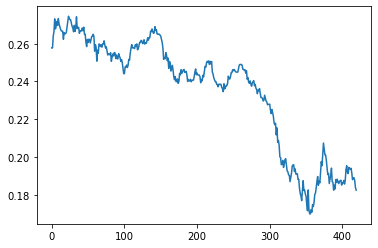

In [6]:
x=np.arange(len(data))
plt.plot(x,data['Close'])
plt.show()

### Plotting acf and pacf of original data

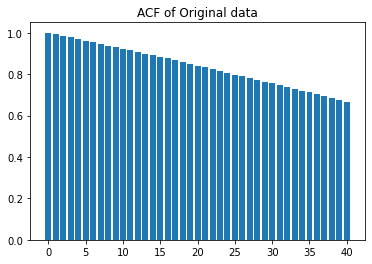

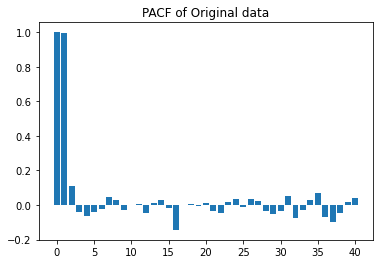

In [7]:
data_acf=acf(data['Close'],nlags=40,fft=False)
plt.bar(np.arange(41),data_acf)
plt.title("ACF of Original data")
plt.show()
data_pacf=pacf(data['Close'],nlags=40)
plt.bar(np.arange(41),data_pacf)
plt.title("PACF of Original data")
plt.show()

#### From here we can see that pacf of data is not going to zero and also acf of data is not going to zero hence AR and MA model cant fit to the data.Hence lets try to check for stationary of data and also try to fit the ARMA,ARIMA and SARIMA model.

#### Stationarity test for original data by adfuller method

In [8]:
adf=adfuller(data['Close'])
print("ADF Statistic: ",adf[0])  
print("Critical Values: ",adf[4])  

ADF Statistic:  -0.29567364005086894
Critical Values:  {'1%': -3.4461675720270404, '5%': -2.8685128587855955, '10%': -2.5704843086630915}


### From above we can see that adf statistic value is greater than all critical values.Hence we accept the null hypothesis and null hypothesis is that the time series is non-stationary and the alternative hypothesis is that the time series is stationary.Hence time series is not stationary.Hence we apply differencing to make data stationary

### Applying differencing technique to make data stationary

In [9]:
new_close=list(data['Close'])
new_close_list=[]
for i in range(1,len(new_close)):
    new_close_list.append(new_close[i]-new_close[i-1])

### plotting the data after applying differencing technique

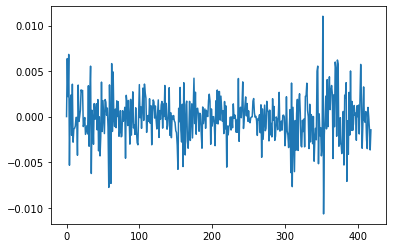

In [10]:
x=np.arange(len(new_close_list))
plt.plot(x,new_close_list)
plt.show()

### Plotting acf and pacf of transformed data i.e obtained after applying differencing technique

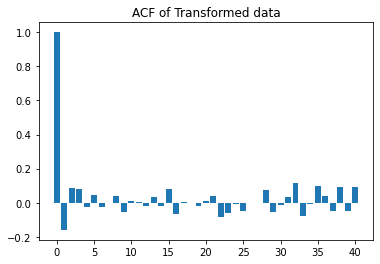

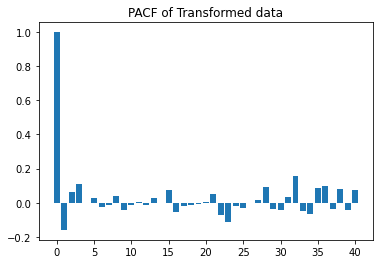

In [11]:
data_t_acf=acf(new_close_list,nlags=40,fft=False)
plt.bar(np.arange(41),data_t_acf)
plt.title("ACF of Transformed data")
plt.show()
data_t_pacf=pacf(new_close_list,nlags=40)
plt.bar(np.arange(41),data_t_pacf)
plt.title("PACF of Transformed data")
plt.show()

### Applying adfuller test to the data obtained after applying differencing to check whether data became stationary or not

In [12]:
adf=adfuller(new_close_list)
print("ADF Statistic: ",adf[0])  
print("Critical Values: ",adf[4])  

ADF Statistic:  -10.721669837503347
Critical Values:  {'1%': -3.4461675720270404, '5%': -2.8685128587855955, '10%': -2.5704843086630915}


### From the above we can see that adf statistic is less than all critical values.Hence we reject the null hypothesis that time series is not stationary.Hence data is stationary

### As data became stationary after applying differencing once hence d=1 and also as d is not equal to 0.Hence arma model doesnt fit into this data.Hence lets try to fix arima model and also if we observe the original graph we can see that there is no seasonality in the graph.Hence sarima also doesnt fit into this data.

### Fitting the arima model

### In the below cell we are using auto_arima function from pmdarima to get p,q values it uses aic value only while comparison

In [13]:
import pmdarima as pmd
autoarima_model=pmd.auto_arima(data['Close'],start_p=0,start_q=0,test="adf",trace=True)
autoarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3823.322, Time=1.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3832.100, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3829.911, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3823.186, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3831.867, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3830.562, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3817.318, Time=0.62 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3831.187, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 3.809 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  420
Model:               SARIMAX(1, 1, 0)   Log Likelihood                1919.050
Date:                Fri, 06 May 2022   AIC                          -3832.100
Time:                        23:36:19   BIC                          -3819.987
Sample:                             0   HQIC                         -3827.312
                                - 420                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -1.706      0.088      -0.000    3.11e-05
ar.L1         -0.1596      0.036     -4.458      0.000      -0.230      -0.089
sigma2      6.158e-06   3.31e-07     18.595      0.000    5.51e-06    6.81e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                34.14
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### From above we can see that it is giving that p=1,q=0 is the best params and arima(1,1,0) is the best fitted model for the given data

### Here we are doing dynamic forecasting that is when we are predicting the nth value for that we are fitting the model that using values from 0 to n-1 then predicting on the nth value it gives the value predicted at that point of time.

In [14]:
prediction_data=[]
p=1
q=0
for i in range(len(data),len(df)):
    model_arima=ARIMA(df['Close'][:i],order=(1,1,0))
    model=model_arima.fit()
    prediction_data.append(list(model.predict(start=i,end=i))[0])

### Plotting the actual data and the predicted data

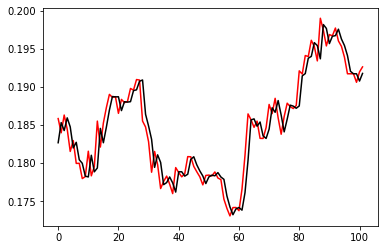

In [15]:
x=np.arange(len(test_data))
plt.plot(x,test_data['Close'],c='red')
plt.plot(x,prediction_data,c='black')
plt.show()

### Printing MSE value

In [16]:
print(mean_squared_error(test_data['Close'],prediction_data))

4.360081438392454e-06


## Hence the best fit for this data is arima(1,1,0)

In [17]:
# p=6
# q=6
# d=1
# orders=[(p,d,q) for p in range(1,6) for q in range(1,6)]
# models=[]
# model_errors=[]
# predictions=[]
# for order in orders:
#     prediction_1=[]
#     for i in range(len(data),len(df)):
#         model_arima=ARIMA(df['Close'][:i],order=order)
#         model=model_arima.fit()
#         prediction_1.append(list(model.predict(start=i,end=i))[0])
#     model_errors.append(mean_squared_error(test_data['Close'],prediction_1))
#     predictions.append(prediction_1)
#       x=np.arange(len(test_data))
#       plt.plot(x,test_data['Close'],c='red')
#       plt.plot(x,prediction_1,c='black')
#       plt.show()

### Volatality

### Here we are finding volatality by taking difference between close and open prices

In [31]:
volatality=test_data['Close']-prediction_data

### plotting volatality values

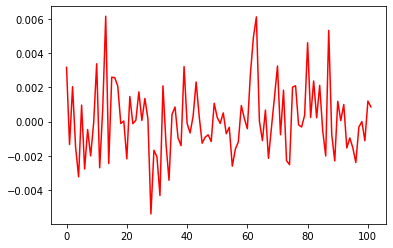

In [33]:
plt.plot(np.arange(len(test_data)),volatality,c='r')
plt.show()

### importing arch_model from arch library

In [34]:
from arch import arch_model

### taking orders as random and checking which has the lowest aic value 

In [35]:
orders=[(i,j) for i in range(1,5) for j in range(1,5)]

### fitting arch_model for mutiple orders

In [36]:
aic_values=[]
for order in orders:
    model=arch_model(volatality,p=order[0],q=order[1])
    fit_model=model.fit()
    aic_values.append([fit_model.aic,order])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5075494677.593472
Iteration:      2,   Func. Count:     18,   Neg. LLF: -485.22803951414903
Optimization terminated successfully    (Exit mode 0)
            Current function value: -485.22803953207676
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: 9888652318.664545
Iteration:      2,   Func. Count:     21,   Neg. LLF: 3818.821901573557
Iteration:      3,   Func. Count:     33,   Neg. LLF: 906600.0411373008
Optimization terminated successfully    (Exit mode 0)
            Current function value: -485.1767698871674
            Iterations: 5
            Function evaluations: 41
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      8,   Neg. LLF: 862487180.2233971
Iteration:      2,   Func. Count:     22,   Neg. LLF: -485.1008957513625
Optimization terminated successfully    (Exit mode 0)
            Current fu

C:\Users\Manoj\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\Manoj\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



Inequality constraints incompatible    (Exit mode 4)
            Current function value: -446.29003481805347
            Iterations: 8
            Function evaluations: 105
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      9,   Neg. LLF: 58059004.46762563
Iteration:      2,   Func. Count:     25,   Neg. LLF: 15568.758357828947
Iteration:      3,   Func. Count:     39,   Neg. LLF: 5365865.714725918
Optimization terminated successfully    (Exit mode 0)
            Current function value: -484.92538764352594
            Iterations: 4
            Function evaluations: 47
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     10,   Neg. LLF: 1.563453686590796e+17
Iteration:      2,   Func. Count:     27,   Neg. LLF: 700926918233088.9
Iteration:      3,   Func. Count:     46,   Neg. LLF: 1.6952438190132467e+24
Iteration:      4,   Func. Count:     65,   Neg. LLF: 5047640944704326.0
Iteration:      5,   Func. Count:     84,   Neg. LLF: 4.0421230236

C:\Users\Manoj\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


### printing aic values after sorting then first value will be the required value

In [37]:
aic_values.sort()
aic_values

[[-962.4560790641535, (1, 1)],
 [-960.3535397743348, (1, 2)],
 [-960.350188919468, (2, 1)],
 [-958.201791547851, (1, 3)],
 [-958.1347830714463, (2, 2)],
 [-958.072314758634, (3, 1)],
 [-956.1867623264889, (1, 4)],
 [-956.0732928887346, (2, 3)],
 [-956.0021597296659, (3, 2)],
 [-955.8507752870519, (4, 1)],
 [-954.0495273556859, (3, 3)],
 [-951.9967489778863, (4, 3)],
 [-950.0570591744016, (4, 4)],
 [-874.5800696361069, (3, 4)],
 [-815.5695977942249, (4, 2)],
 [-691.5183931116217, (2, 4)]]

### printing p,q values

In [38]:
p,q=aic_values[0][1]
p,q

(1, 1)

### fitting arch model with the p,q obtained above

In [39]:
model=arch_model(volatality,p=1,q=1)
fitted_model=model.fit()
fitted_model.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5075494677.593472
Iteration:      2,   Func. Count:     18,   Neg. LLF: -485.22803951414903
Optimization terminated successfully    (Exit mode 0)
            Current function value: -485.22803953207676
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                485.228
Distribution:                  Normal   AIC:                          -962.456
Method:            Maximum Likelihood   BIC:                          -951.956
                                        No. Observations:                  102
Date:                Fri, May 06 2022   Df Residuals:                      101
Time:                        23:47:15   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0069e-04  1.928e-07    522.257      0.000 [1.003e-04,1.011e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.1739e-06  1.055e-10  2.060e+04      0.000 [2.174e-06,2.174e-06]
alpha[1]       0.0500      0.121      0.412      0.680     [ -0.188,  0.288]
beta[1]        0.4500      0.145      3.102  1.925e-03     [  0.166,  0.734]
============================================================================

Covariance estimator: robust
"""

#### Here we have fitted arch(1,1) model to this residual data.then we can use this to forecast the data

In [45]:
def rolling_predictions(n=20) : 
    predicted_values=[]
    for i in range(n):
        model=arch_model(volatality[:80+i],p=1,q=1)
        fitted_model=model.fit()
        predicted_values.append(fitted_model.forecast (horizon=1).variance.iloc[-1].values)
    return predicted_values 

rolling_predictions()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48900755510.28863
Iteration:      2,   Func. Count:     18,   Neg. LLF: -380.05225949245596
Optimization terminated successfully    (Exit mode 0)
            Current function value: -380.0522595113374
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49258171768.21163
Iteration:      2,   Func. Count:     18,   Neg. LLF: 31166778241.324642
Iteration:      3,   Func. Count:     30,   Neg. LLF: 599265.7495131539
Iteration:      4,   Func. Count:     39,   Neg. LLF: 81914907.25292881
Optimization terminated successfully    (Exit mode 0)
            Current function value: -382.6814700520856
            Iterations: 6
            Function evaluations: 47
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 949005639.6706797
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1075280.8128729279
Iter

[array([3.78347519e-06]),
 array([5.94232411e-06]),
 array([4.6492484e-06]),
 array([4.6445804e-06]),
 array([4.34380594e-06]),
 array([4.4119815e-06]),
 array([4.23723267e-06]),
 array([4.38611072e-06]),
 array([5.77358012e-06]),
 array([4.97822222e-06]),
 array([4.91202916e-06]),
 array([4.58682515e-06]),
 array([4.35931368e-06]),
 array([4.27166666e-06]),
 array([4.3462078e-06]),
 array([4.26948255e-06]),
 array([4.30969237e-06]),
 array([4.52378195e-06]),
 array([4.27130336e-06]),
 array([4.12714078e-06])]

### Here we predicted the values in the above cell

### This project is done by Chundru Manoj Sai Surendra - 1903205 - M&C